18 cars passing a certain tollboth at different time of the day (x) with different speed (y)

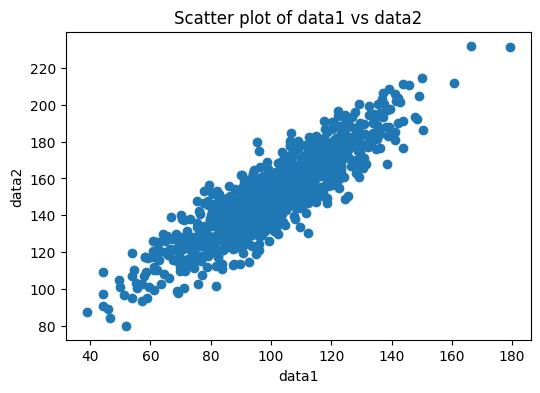

--- Pearson Correlation Summary ---
data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358
Covariance: 389.755
Pearsons correlation: 0.888



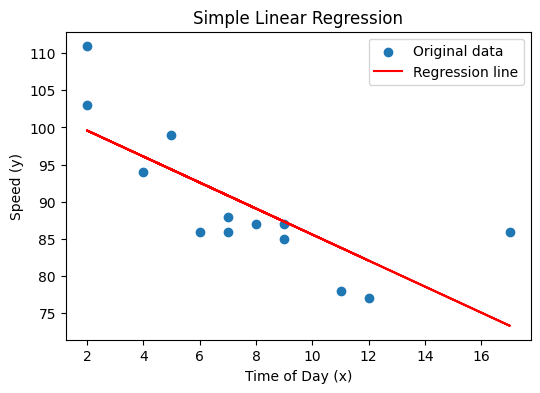

--- Simple Linear Regression Summary ---
Slope: -1.7512877115526118
Intercept: 103.10596026490066
Pearsons correlation: -0.759

--- Multiple Linear Regression ---
Coefficients: [-0.03295455  0.12477273]
Intercept: 37.13636363636361
Predicted CO2 for Weight=1400, Volume=950: 109.53409090909089 



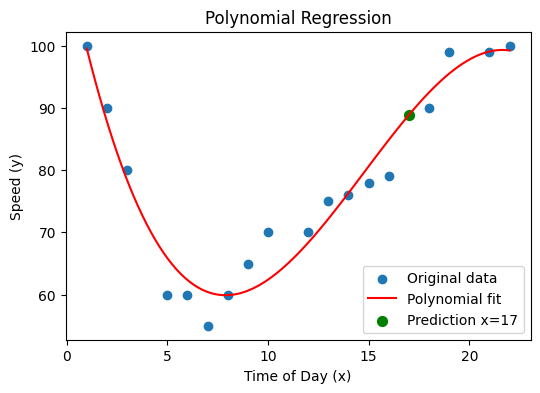

--- Polynomial Regression Summary ---
Predicted y for x=17: 88.87331269698001
R² score: 0.9432150416451026

Predicted speed of car at tollbooth around 17 P.M.: 88.87331269698001


In [1]:
# ======================================================
# COMBINED CORRELATION & REGRESSION ANALYSIS
# ======================================================

# Step 0: Import required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import pearsonr, linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# ======================================================
# 1. Pearson's Correlation (Synthetic Data Example)
# ======================================================

# Seed random number generator for reproducibility
np.random.seed(1)

# Generate synthetic data to demonstrate correlation
data1 = 20 * np.random.randn(1000) + 100  # first variable
data2 = data1 + (10 * np.random.randn(1000) + 50)  # second variable dependent on data1

# Calculate covariance matrix
covariance = np.cov(data1, data2)

# Calculate Pearson's correlation coefficient
corr, _ = pearsonr(data1, data2)

# Scatter plot to visualize relationship
plt.figure(figsize=(6,4))
plt.scatter(data1, data2)
plt.title("Scatter plot of data1 vs data2")
plt.xlabel("data1")
plt.ylabel("data2")
plt.show()

# Output explanation in comments:
# - data1 and data2 are positively correlated.
# - Covariance = 389.755 indicates positive linear relationship.
# - Pearson correlation = 0.888 shows strong positive correlation.
print('--- Pearson Correlation Summary ---')
print('data1: mean=%.3f stdv=%.3f' % (np.mean(data1), np.std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (np.mean(data2), np.std(data2)))
print('Covariance: %.3f' % covariance[0][1])
print('Pearsons correlation: %.3f\n' % corr)

# ======================================================
# 2. Simple Linear Regression
# ======================================================
# Sample data: speed of 13 cars at different times
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]  # independent variable (time)
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]  # dependent variable (speed)

# Fit linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Pearson correlation for these variables
corr_simple, _ = pearsonr(x, y)

# Function to predict y-values based on regression line
def predict_y(x):
    return slope * x + intercept

# Predicted values
y_model = list(map(predict_y, x))

# Scatter plot with regression line
plt.figure(figsize=(6,4))
plt.scatter(x, y, label="Original data")
plt.plot(x, y_model, color='red', label="Regression line")
plt.title("Simple Linear Regression")
plt.xlabel("Time of Day (x)")
plt.ylabel("Speed (y)")
plt.legend()
plt.show()

# Output explanation in comments:
# - Slope = -1.751 → speed decreases as time increases.
# - Intercept = 103.106 → predicted speed when x=0.
# - Pearson correlation = -0.759 → strong negative correlation.
print('--- Simple Linear Regression Summary ---')
print('Slope:', slope)
print('Intercept:', intercept)
print('Pearsons correlation: %.3f\n' % corr_simple)

# ======================================================
# 3. Multiple Linear Regression
# ======================================================
# Sample dataset: predict CO2 using car features (Weight and Volume)
data = {
    'Weight': [1200, 1500, 1700, 1300, 1600, 1800],
    'Volume': [800, 1000, 1200, 900, 1100, 1300],
    'CO2': [99, 110, 130, 105, 125, 140]
}
df = pd.DataFrame(data)

# Independent variables (features) and dependent variable (target)
X = df[['Weight', 'Volume']]
y = df['CO2']

# Fit multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict CO2 for a new car using DataFrame to avoid UserWarning
new_car = pd.DataFrame([[1400, 950]], columns=['Weight', 'Volume'])
predicted_CO2 = model.predict(new_car)

# Output explanation in comments:
# - Coefficients indicate impact of each feature on CO2.
# - Intercept is baseline CO2 when features=0.
# - Predicted CO2 for Weight=1400, Volume=950 is 109.53 g/km
print('--- Multiple Linear Regression ---')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Predicted CO2 for Weight=1400, Volume=950:', predicted_CO2[0], '\n')

# ======================================================
# 4. Polynomial Regression
# ======================================================
# Sample data: speed of 18 cars at different times (x_poly vs y_poly)
x_poly = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y_poly = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

# Fit 3rd-degree polynomial
poly_model = np.poly1d(np.polyfit(x_poly, y_poly, 3))

# Predict y for x=17
predicted_y = poly_model(17)

# R² score to measure fit quality
r2 = r2_score(y_poly, poly_model(x_poly))

# Plot
plt.figure(figsize=(6,4))
plt.scatter(x_poly, y_poly, label='Original data')
x_line = np.linspace(1, 22, 100)
plt.plot(x_line, poly_model(x_line), color='red', label='Polynomial fit')
plt.scatter(17, predicted_y, color='green', s=50, label='Prediction x=17')
plt.title('Polynomial Regression')
plt.xlabel('Time of Day (x)')
plt.ylabel('Speed (y)')
plt.legend()
plt.show()

# Output explanation in comments:
# - Polynomial regression fits a curve to capture non-linear trend.
# - Predicted speed at x=17 → 88.87
# - R² = 0.943 → very good fit of model to data
print('--- Polynomial Regression Summary ---')
print('Predicted y for x=17:', predicted_y)
print('R² score:', r2)

# ======================================================
# 5. Predict future speed at tollbooth (example)
# ======================================================
future_time = 17  # 17 P.M.
predicted_speed = poly_model(future_time)

# Output explanation in comments:
# - Using polynomial model, predicted speed at 17 P.M. = 88.87
print('\nPredicted speed of car at tollbooth around 17 P.M.:', predicted_speed)


## Predict Future Values

Let us try to predict the speed of a car that passes the tollbooth at around 17 P.M

Predicted speed of a car at 17 P.M.: 88.87


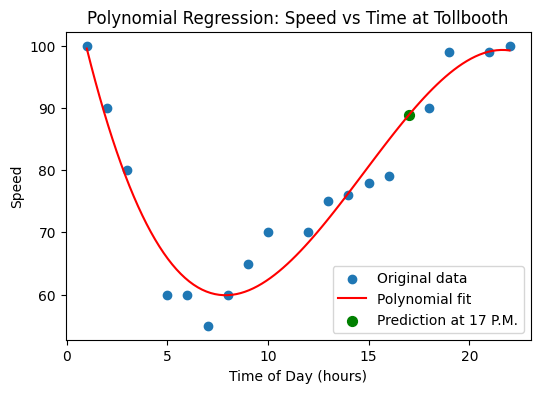

In [2]:
# ======================================================
# Predicting Future Speed at Tollbooth (Polynomial Regression)
# ======================================================

import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

# Sample data: 18 cars passing tollbooth at different times (x_poly) and their speeds (y_poly)
x_poly = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]  # Time of day (hours)
y_poly = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]  # Speed of cars

# Fit 3rd-degree polynomial to model non-linear relationship
poly_model = np.poly1d(np.polyfit(x_poly, y_poly, 3))

# Predict speed for a car passing at 17 P.M.
future_time = 17
predicted_speed = poly_model(future_time)

# Display the predicted value
print(f"Predicted speed of a car at {future_time} P.M.: {predicted_speed:.2f}")

# Optional: visualize original data, polynomial fit, and predicted point
plt.figure(figsize=(6,4))
plt.scatter(x_poly, y_poly, label='Original data')
x_line = np.linspace(1, 22, 100)
plt.plot(x_line, poly_model(x_line), color='red', label='Polynomial fit')
plt.scatter(future_time, predicted_speed, color='green', s=50, label=f'Prediction at {future_time} P.M.')
plt.title('Polynomial Regression: Speed vs Time at Tollbooth')
plt.xlabel('Time of Day (hours)')
plt.ylabel('Speed')
plt.legend()
plt.show()
